<a href="https://colab.research.google.com/github/AmirHosseinAlikhahMishamandani/MachineLearningJourney/blob/main/MNIST_K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The MNIST: K-Nearest Neighbors (KNN)

The MNIST database, curated by Yann LeCun from NYU, Corinna Cortes from Google Labs, and Christopher J.C. Burges from Microsoft Research, consists of handwritten digits. It comprises a training set with 60,000 examples and a test set with 10,000 examples, derived from a larger NIST dataset. These digits are standardized in size and centered within fixed-size images. MNIST serves as an ideal resource for individuals interested in experimenting with learning techniques and pattern recognition methods using real-world data, with minimal preprocessing and formatting required.

**Context**

MNIST is a subset of a larger set available from NIST (it's copied from http://yann.lecun.com/exdb/mnist/)

**Content**

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
Four files are available:

- train-images-idx3-ubyte.gz: training set images (9912422 bytes)
- train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
- t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
- t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

## Imports

In [ ]:
import random
import numpy as np
import struct
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Utility

In [ ]:
%matplotlib inline

# Setting random seed for reproducibility
random.seed(0)
np.random.seed(0)

## Load MNIST dataset

In [ ]:
# Load the MNIST dataset with the 'auto' parser
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist['data'], mnist['target']

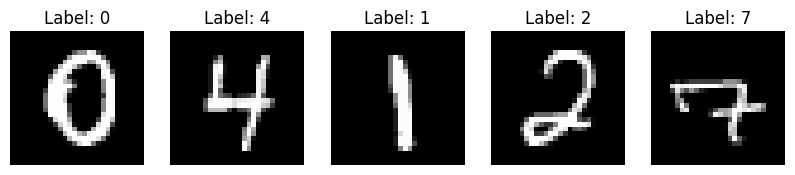

In [ ]:
# Choose the number of random images you want to plot
num_images = 5
random_indices = np.random.choice(X.shape[0], num_images, replace=False)

# Plot the random images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    Xvals = X.iloc[idx].values
    plt.imshow(Xvals.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')

plt.show()

## Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize KNN classifier

![0*34SajbTO2C5Lvigs.png](attachment:f1517421-2f7e-4676-afc3-852b0a10aeff.png)

### Understanding Minkowski Distance and Manhattan (L1 Norm) in KNN

In the K-Nearest Neighbors (KNN) algorithm, Minkowski distance and Manhattan (L1 norm) distance (when $p=1$ in Minkowski distance) are used as metrics to measure the distance between data points.

1. **Manhattan (L1 Norm) Distance $(p=1)$:**
   - The Manhattan distance, also known as the L1 norm, measures the distance between two points in a grid-like path.
   - It is calculated as the sum of the absolute differences between the coordinates of the points.
   - In KNN, the Manhattan distance calculates the distance between the target point and each point in the dataset by summing the absolute differences between their coordinates along each dimension.

2. **Minkowski Distance:**
   - The Minkowski distance is a generalized distance metric that encompasses both Euclidean distance $(p=2)$ and Manhattan distance $(p=1)$ as special cases.
   - It is defined as:
     $$D(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{\frac{1}{p}}$$
     where $x$ and $y$ are two data points,$x_i$ and $y_i$ are their respective coordinates, and $p$ is the order of the Minkowski distance.
   - When $p=1$, it reduces to the Manhattan distance, and when $p=2$, it becomes the Euclidean distance.
   
In KNN:
- These distance metrics help in determining the "closeness" or similarity between data points.
- When using KNN for classification or regression, the algorithm identifies the k nearest neighbors of a given point based on one of these distance metrics.
- The most common approach is to calculate the distances between the target point and all other points in the dataset, then select the k nearest neighbors based on the smallest distances.
- Once the nearest neighbors are identified, their labels or values are used to predict the label or value of the target point (in classification or regression tasks, respectively).

In summary, both Manhattan distance (L1 norm) and Minkowski distance (with $p=1$) are essential distance metrics used in KNN for measuring the similarity or proximity between data points. They play a crucial role in determining the neighbors used for prediction in the algorithm.


In [ ]:
# Initialize KNN classifier with Minkowski distance and L1 norm (p=1)
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)

## Train the classifier

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

## Predict labels for the test set

In [ ]:
y_pred = knn.predict(X_test_scaled)

## Evaluations

Accuracy: 0.961
Precision: 0.9613443736242074
Recall: 0.961
F1 Score: 0.9608916046577881
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1387
           1       0.94      1.00      0.97      1580
           2       0.97      0.95      0.96      1443
           3       0.95      0.95      0.95      1435
           4       0.97      0.96      0.97      1350
           5       0.96      0.95      0.95      1231
           6       0.97      0.98      0.98      1387
           7       0.96      0.96      0.96      1458
           8       0.98      0.91      0.94      1368
           9       0.94      0.95      0.95      1361

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



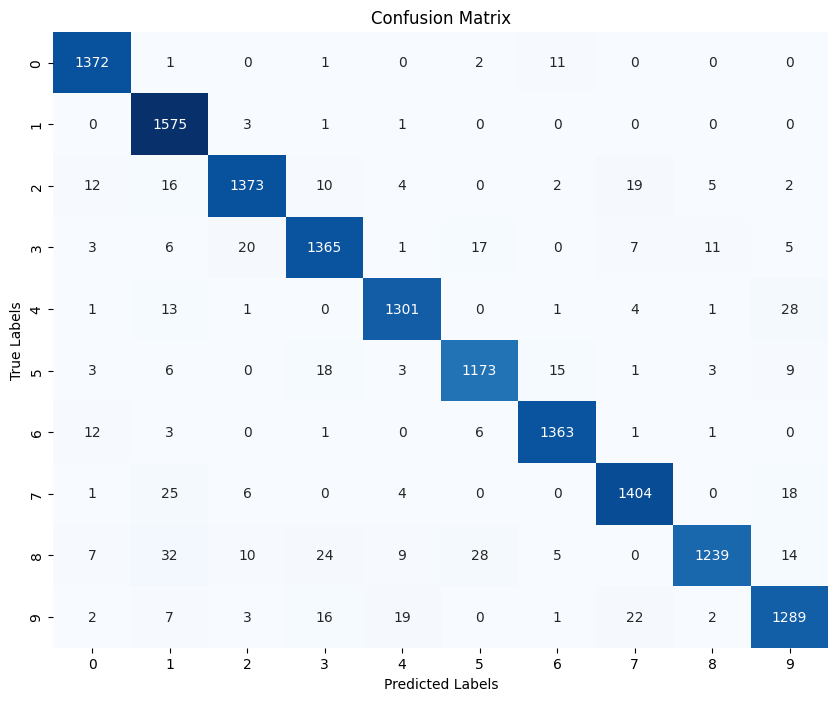

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The analysis of the MNIST dataset using the KNN algorithm with L1 norm and 3 neighbors reveals a highly effective model, boasting an accuracy of 96.1%. Precision scores ranging from 0.94 to 0.98 indicate the model's ability to correctly classify positive predictions for each class, while recall values spanning 0.91 to 1.00 demonstrate its capacity to capture the majority of positive instances within each class. With F1 scores between 0.94 and 0.98, the model achieves a harmonious balance between precision and recall, further affirming its robust performance. The classification report provides detailed insights into the model's performance for each class, including support metrics reflecting the distribution of actual instances. Both macro and weighted averages for precision, recall, and F1 score, standing at 0.96, underscore the model's consistency and effectiveness across the dataset, reinforcing its capability in accurately identifying handwritten digits in the MNIST dataset.

## Testing different K values

In [ ]:
Error_k = []

for n in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=1)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'K = {n}, Accuracy = {accuracy}')
    Error_k.append(1-accuracy)

K = 1, Accuracy = 0.9559285714285715
K = 2, Accuracy = 0.9491428571428572
K = 3, Accuracy = 0.961
K = 4, Accuracy = 0.9587857142857142
K = 5, Accuracy = 0.9602857142857143
K = 6, Accuracy = 0.9582857142857143
K = 7, Accuracy = 0.9572142857142857
K = 8, Accuracy = 0.9555714285714285
K = 9, Accuracy = 0.9557142857142857


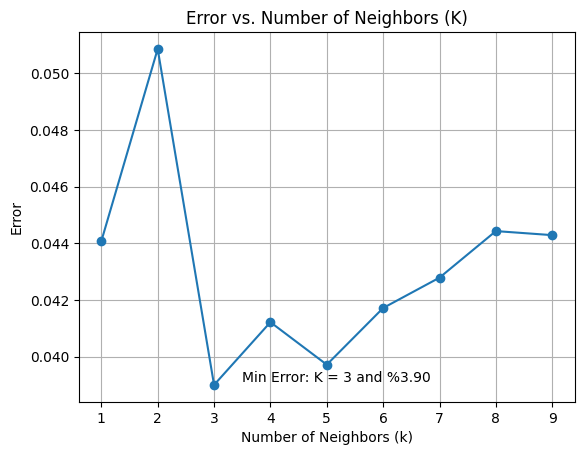

In [ ]:
# Plotting the data
plt.plot(range(1, 10), Error_k, marker='o')
plt.title('Error vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.grid(True)

# Finding the minimum error and its corresponding k value
min_error = min(Error_k)
min_k = Error_k.index(min_error) + 1  # Adding 1 to convert index to k value

# Annotating the minimum point on the plot
plt.text(3.5, 0.039, f'Min Error: K = 3 and %{min_error*100:.2f}',
         horizontalalignment='left', verticalalignment='bottom')

plt.show()

## Testing different training set size

In [ ]:
# Initialize a list to store errors
Error_D = []

# Iterate over different percentages of training data
for percent in range(10, 101, 10):
    # Calculate the number of samples for the current percentage
    num_samples = int(len(X_train_scaled) * percent / 100)

    # Select a subset of training data
    X_train_subset = X_train_scaled[:num_samples]
    y_train_subset = y_train[:num_samples]

    # Initialize and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)
    knn.fit(X_train_subset, y_train_subset)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy for the current percentage
    print(f'Using {percent}% of training data, Accuracy = {accuracy}')

    # Append error to the list
    Error_D.append(1 - accuracy)

Using 10% of training data, Accuracy = 0.9137857142857143
Using 20% of training data, Accuracy = 0.929
Using 30% of training data, Accuracy = 0.9387857142857143
Using 40% of training data, Accuracy = 0.9433571428571429
Using 50% of training data, Accuracy = 0.9483571428571429
Using 60% of training data, Accuracy = 0.9529285714285715
Using 70% of training data, Accuracy = 0.9539285714285715
Using 80% of training data, Accuracy = 0.9566428571428571
Using 90% of training data, Accuracy = 0.959
Using 100% of training data, Accuracy = 0.961


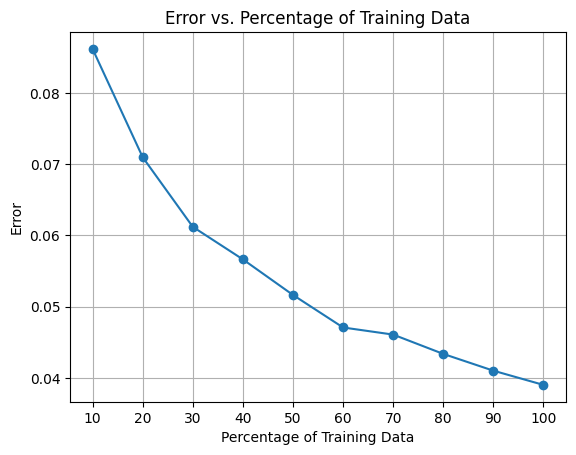

In [ ]:
Percentages =range(10, 101, 10)

plt.plot(Percentages, Error_D, marker='o')
plt.title('Error vs. Percentage of Training Data')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Error')
plt.xticks(Percentages)
plt.grid(True)
plt.show()